# Domain boundary conditions

We investigate the effect of domain boundary condition (either insulating or finite flux) on the solution.

In [1]:
# load required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from diffusion import Domain
from diffusion.analytical import Solver

First, set up two domains as single compartments with equal length and diffusivity, but differing permeabilities at the ends. The first domain (`domain1`) has impermeable barriers, i.e. an insulating condition. This is the default, so we need not specify $\kappa = 0$ explicitly. For the second domain (`domain2`), we specify $\kappa = 0.1$ arbitrarily. We also set up the analytical solvers for both domains.

In [2]:
domain1 = Domain([10], [1], [])  # default to K=0 at domain ends
domain2 = Domain([10], [1], [0.1, 0.1])  # single compartment L=10, D=1, K_L=K_R>0
solver1 = Solver(domain1)
solver2 = Solver(domain2)

## Plotting the function near zero

The function $F(\lambda)$ has a singularity at $\lambda = 0$ for the non-trivial (zero-flux) boundary condition. Let us compare the behaviour of $F$ for both domains.

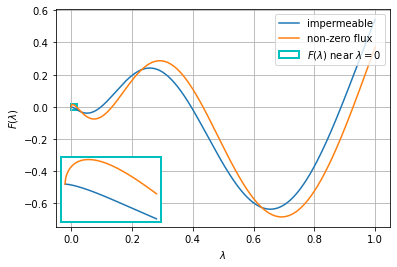

In [3]:
F1, F2 = solver1.eval_F, solver2.eval_F
x_nearzero = np.linspace(0, 0.05, 10001)
x_atzero = np.linspace(0, 0.0001, 1001)

def nearzero(xmax, F, N=10001):
    x = np.linspace(0, xmax, N)
    y = F(x)
    return x, y

xmax1 = 1.0
xmax2 = 0.02

fig, ax = plt.subplots()

# make original plot
ax.plot(*nearzero(xmax1, F1), '-', label="impermeable")
ax.plot(*nearzero(xmax1, F2), '-', label="non-zero flux")
ax.grid('on')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("$F(\lambda)$")

# show subset
ax2 = inset_axes(ax, width='30%', height='30%', loc='lower left')
ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # disable axes
ax2.plot(*nearzero(xmax2, F1), '-')
ax2.plot(*nearzero(xmax2, F2), '-')
xlim, ylim = ax2.get_xlim(), ax2.get_ylim()

# add outline to original axis
ax.add_patch(plt.Rectangle((xlim[0], ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0],
                           ls='-', lw=2, ec='c', fc='None', label="$F(\lambda)$ near $\lambda=0$"))
for _, spine in ax2.spines.items():
    spine.set_color('c')
    spine.set_linewidth(2)

ax.legend(loc='upper right')
plt.show()

## Solution for permeable domain ends

If the domain ends are not enforcing a zero-flux boundary condition, the concentration leaves the domain at a prescribed rate ($\kappa$). This is still a valid solution to the diffusion problem in the domain.

In [4]:
# discretise in space
xq = np.linspace(0, domain1.total_length, 10001)
idx0 = len(xq)//2
x0 = xq[idx0]
solve_kwargs = dict(peak=1)

# find the eigenvalues & modes
eigV = solver1.find_eigV(100, zero=0.00001)
eigM = solver1.find_eigM(xq)

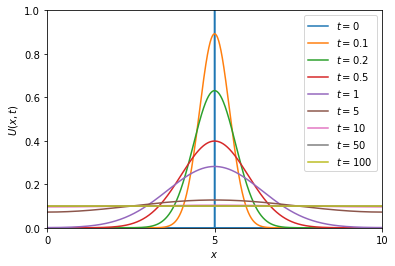

In [5]:
# calculate solution for different time points
t = [0, 0.1, 0.2, 0.5, 1, 5, 10, 50, 100]
G = [solver1.solve(tn, xq, idx0, **solve_kwargs) for tn in t]

fig, ax = plt.subplots()
for tn, Gn in zip(t, G):
    ax.plot(xq, Gn, label="$t = {:g}$".format(tn))
ax.legend()
ax.set_xlim(xq[[0,-1]])
ax.set_ylim((0,1))
ax.set_xticks(np.insert(xq[[0,-1]], 1, x0))
ax.set_xlabel("$x$")
ax.set_ylabel("$U(x, t)$")

plt.show()